# **Data Preprocessing**

## **Data And Library Importing**

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sm
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from IPython.display import Image
import pydotplus
plt.style.use('dark_background')
import warnings

warnings.filterwarnings('ignore')

In [195]:
pwd

'C:\\Users\\ASUS\\OneDrive - Knowledge Lavenir\\Desktop\\Python_for _DS\\Internshala\\Final\\Subham-TechWorks_Consulting_Student_Hiring_Model'

In [196]:
df = pd.read_csv('sydney_rain prediction.csv', header = 0)

In [197]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [198]:
df.shape

(3337, 17)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [200]:
df['Date']=pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['year']=df.Date.dt.year
df['month']=df.Date.dt.month
df['day']=df.Date.dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

## **Ploting the Data**

<Axes: ylabel='count'>

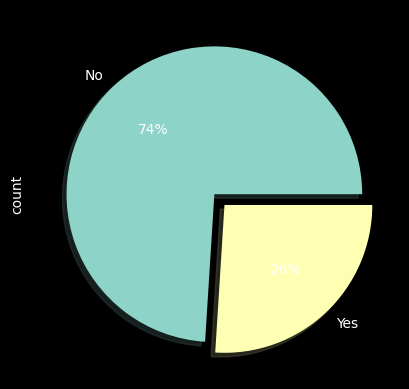

In [201]:
df['RainToday'].value_counts().plot(kind='pie',shadow=True,autopct='%.0f%%',explode=(0,0.1))

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

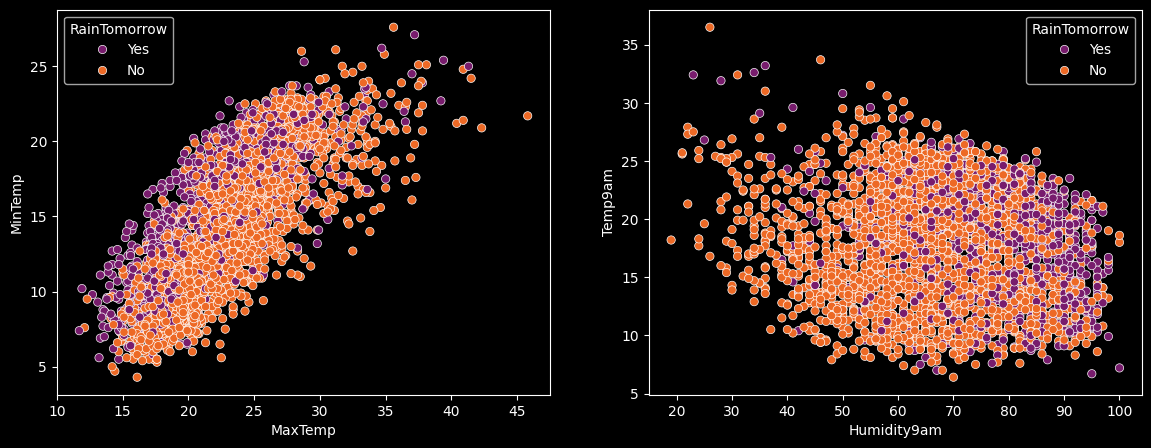

<Figure size 400x400 with 0 Axes>

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
plt.figure(figsize = (4,4))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df, ax=ax1)
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df, ax=ax2)

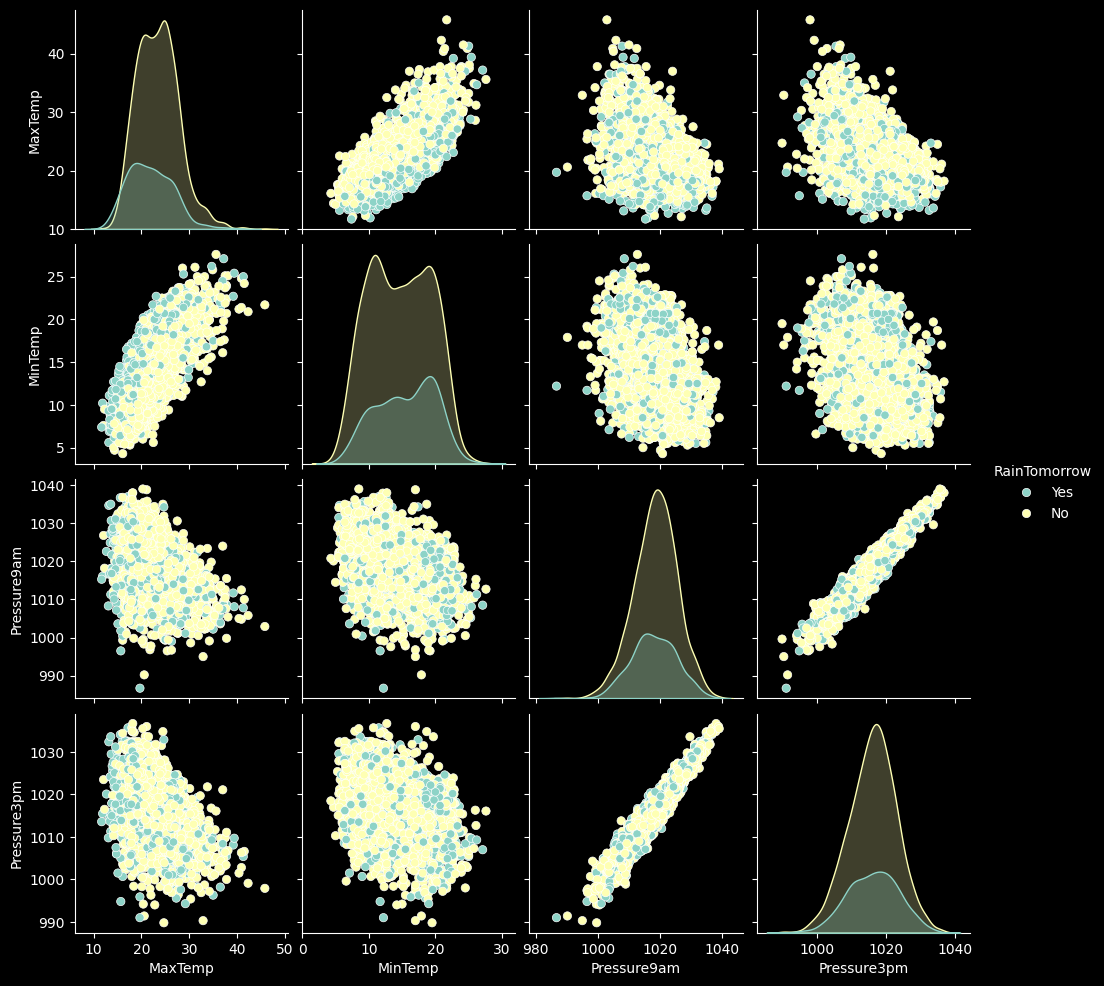

In [203]:
sns.pairplot(data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow')
plt.show()

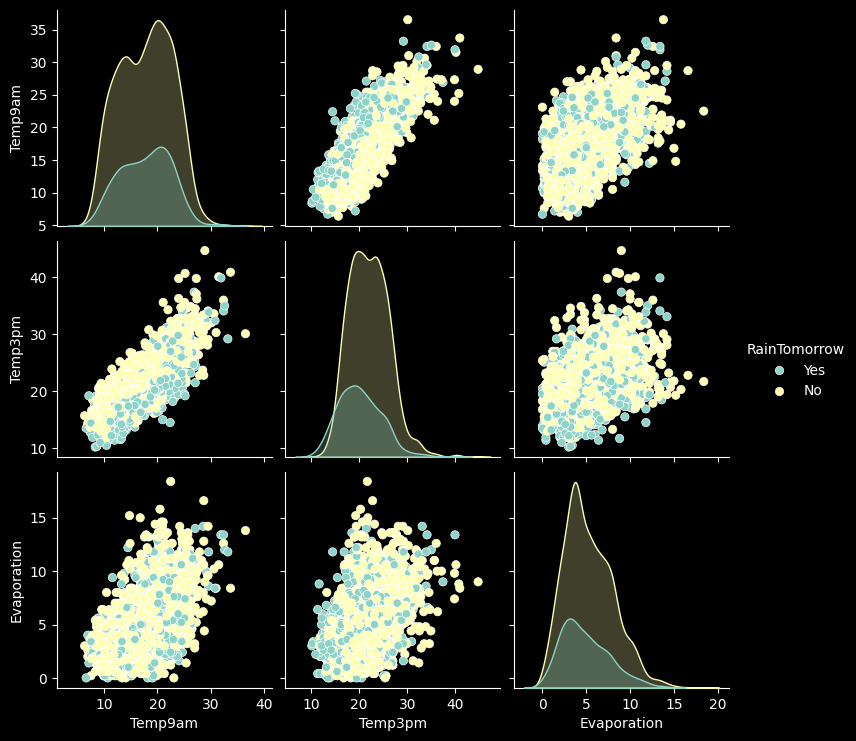

In [204]:
sns.pairplot(data=df, vars=('Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow')
plt.show()

[]

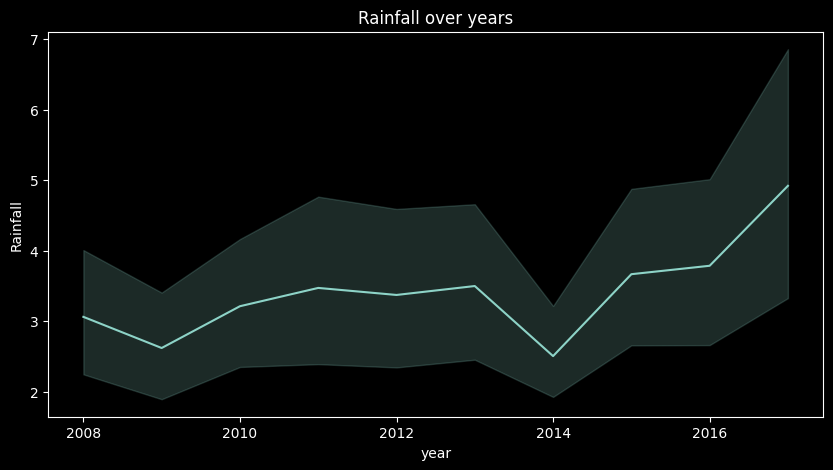

In [205]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='year',y='Rainfall')
plt.title('Rainfall over years')
plt.plot()

## **Checking For Missing data**

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [207]:
df = df.drop(["Date","Location","year","month","day"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [208]:
categorical_features = df.select_dtypes(include = ['object']).columns.tolist()
numerical_features = df.select_dtypes(include = ['float64']).columns.tolist()

print('Number of numerical independent features: ', len(numerical_features))
print('Number of categorical independent features: ', len(categorical_features))

Number of numerical independent features:  13
Number of categorical independent features:  2


In [209]:
cat=df.dtypes=="object"
cat_col=list(cat[cat].index)
print(cat_col)

['RainToday', 'RainTomorrow']


In [210]:
for i in cat_col:
  df[i].fillna(df[i].mode(),inplace=True)

In [211]:
df.RainToday = df.RainToday.fillna(df.RainToday.mode())

In [212]:
num = df.dtypes != 'object'
num_col=list(num[num].index)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [213]:
for i in num_col:
  df[i].fillna(df[i].mean(),inplace=True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3337 non-null   float64
 1   MaxTemp       3337 non-null   float64
 2   Rainfall      3337 non-null   float64
 3   Evaporation   3337 non-null   float64
 4   Sunshine      3337 non-null   float64
 5   Humidity9am   3337 non-null   float64
 6   Humidity3pm   3337 non-null   float64
 7   Pressure9am   3337 non-null   float64
 8   Pressure3pm   3337 non-null   float64
 9   Cloud9am      3337 non-null   float64
 10  Cloud3pm      3337 non-null   float64
 11  Temp9am       3337 non-null   float64
 12  Temp3pm       3337 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


In [215]:
# deleting the missing rows of RainToday
df = df.dropna(subset=['RainToday'])

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3331 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3331 non-null   float64
 1   MaxTemp       3331 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3331 non-null   float64
 4   Sunshine      3331 non-null   float64
 5   Humidity9am   3331 non-null   float64
 6   Humidity3pm   3331 non-null   float64
 7   Pressure9am   3331 non-null   float64
 8   Pressure3pm   3331 non-null   float64
 9   Cloud9am      3331 non-null   float64
 10  Cloud3pm      3331 non-null   float64
 11  Temp9am       3331 non-null   float64
 12  Temp3pm       3331 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3331 non-null   object 
dtypes: float64(13), object(2)
memory usage: 416.4+ KB


## **Checking For the Outliers**

In [217]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.863613,22.997029,3.330231,5.185428,7.173663,68.256141,54.717229,1018.349031,1016.021750,4.182587,4.218557,17.814674,21.528680
std,4.552071,4.488817,9.895172,2.755999,3.802596,15.043902,16.260795,6.997672,7.005448,2.506658,2.411407,4.891371,4.299054
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.100000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.500000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


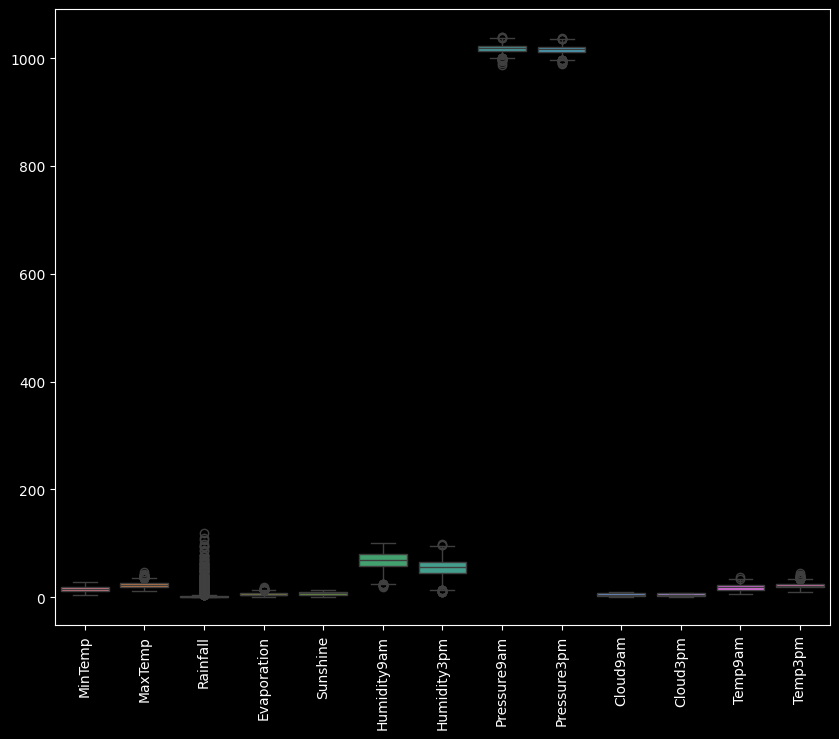

In [218]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Rainfall'>

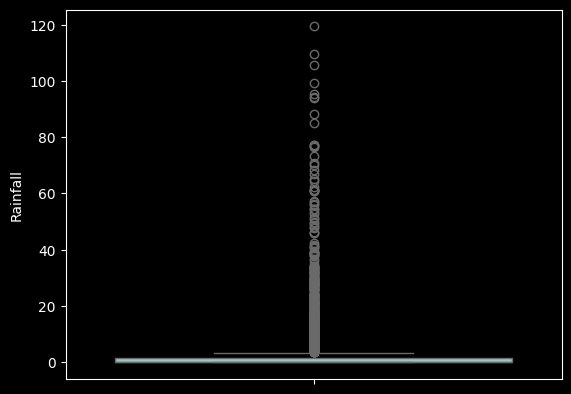

In [219]:
sns.boxplot(y="Rainfall", data=df)

In [220]:
import pandas as pd

# Calculate IQR for the 'rainfall' column
Q1 = df['Rainfall'].quantile(0.25)
Q3 = df['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping/flooring outliers in the 'rainfall' column
df['Rainfall'] = df['Rainfall'].clip(lower=lower_bound, upper=upper_bound)

# Filter out all outliers in the entire dataframe
# Uncomment the next line if you want to filter out rows with any outliers in any column
# df_no_outliers = df[~((df < (df.quantile(0.25) - 1.5 * (df.quantile(0.75) - df.quantile(0.25)))) | (df > (df.quantile(0.75) + 1.5 * (df.quantile(0.75) - df.quantile(0.25))))).any(axis=1)]

# If you want to see the effect of capping
original_stats = df.describe()
capped_stats = df.describe()

original_stats.loc[:, ['Rainfall']], capped_stats.loc[:, ['Rainfall']]



(          Rainfall
 count  3331.000000
 mean      0.864485
 std       1.390948
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       1.400000
 max       3.500000,
           Rainfall
 count  3331.000000
 mean      0.864485
 std       1.390948
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       1.400000
 max       3.500000)

<Axes: ylabel='Rainfall'>

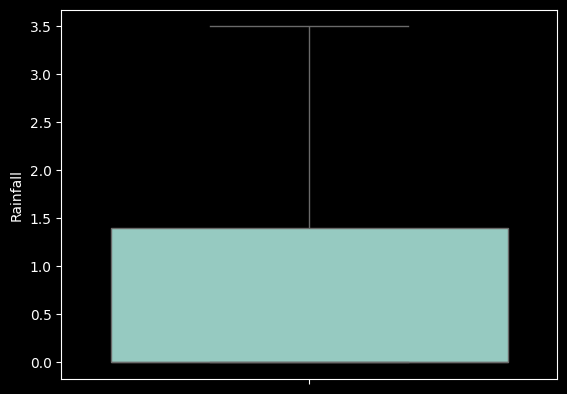

In [221]:
sns.boxplot(y="Rainfall", data=df)

## **Dummy Variables**

In [222]:
cat=df.dtypes=="object"
cat_col=list(cat[cat].index)
print(cat_col)

['RainToday', 'RainTomorrow']


In [223]:
dummy_df= pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True, dtype=int)
dummy_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


## **The Correlation Matrix**

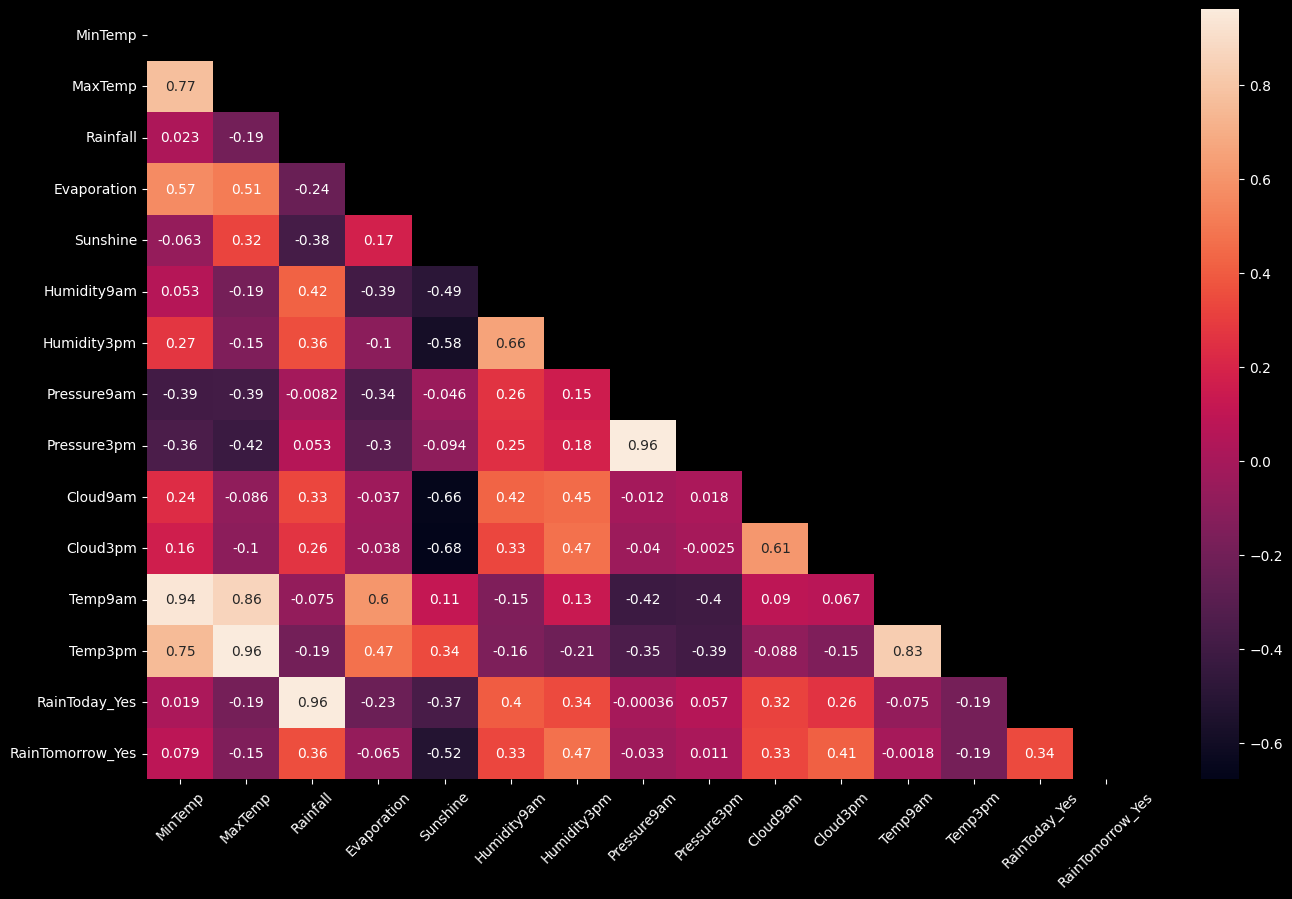

In [224]:
corri = dummy_df.corr()
mask = np.triu(np.ones_like(corri, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(corri, annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

## **x-y split**

In [225]:
dummy_df.shape

(3331, 15)

In [226]:
x_multi = dummy_df.loc[:, dummy_df.columns !="RainTomorrow_Yes"]
y_multi = dummy_df['RainTomorrow_Yes']

In [227]:
print(x_multi.shape, y_multi.shape)

(3331, 14) (3331,)


## **Test-Train Split**

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi ,test_size=0.2,random_state=0)

In [230]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2664, 14) (667, 14) (2664,) (667,)


# **Model Engineering**

## **Model_1: Multiple Logisctic Regression**

In [231]:
from sklearn.linear_model import LogisticRegression
clf_lrs_multi = LogisticRegression()
clf_lrs_multi.fit(x_multi,y_multi)

LogisticRegression()

In [232]:
clf_lrs_multi.coef_

array([[-0.11332376,  0.09897069,  0.26677332,  0.03670067, -0.22094019,
         0.00460215,  0.04960141, -0.08602219,  0.08182385, -0.1082835 ,
         0.18069675,  0.03866769, -0.02618077,  0.07878556]])

In [233]:
clf_lrs_multi.intercept_

array([0.00087345])

In [234]:
import statsmodels.api as sn
x_cons_multi = sn.add_constant(x_multi)

In [235]:
logit_multi = sm.Logit(y_multi,x_cons_multi).fit()

Optimization terminated successfully.
         Current function value: 0.380110
         Iterations 7


In [236]:
logit_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3331
Model:                          Logit   Df Residuals:                     3316
Method:                           MLE   Df Model:                           14
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.3356
Time:                        21:57:50   Log-Likelihood:                -1266.1
converged:                       True   LL-Null:                       -1905.6
Covariance Type:            nonrobust   LLR p-value:                1.782e-264
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.7668      8.532      3.606      0.000      14.044      47.490
MinTemp          -0.2392      0.048     -4.961      0.000      -0.334      -0.145
MaxTemp           0.0775      0.043      1.795      0.073      -0.007       0.162
Rainfall          0.2872      0.114      2.530      0.011       0.065       0.510
Evaporation       0.0673      0.025      2.652      0.008       0.018       0.117
Sunshine         -0.2299      0.023    -10.137      0.000      -0.274      -0.185
Humidity9am       0.0130      0.007      1.882      0.060      -0.001       0.027
Humidity3pm       0.0524      0.007      7.640      0.000       0.039       0.066
Pressure9am      -0.1156      0.031     -3.713      0.000      -0.177      -0.055
Pressure3pm       0.0809      0.030      2.694      0.007       0.022       0.140
Cloud9am         -0.0816      0.030     -2.680      0.007      -0.141      -0.022
Cloud3pm          0.1467      0.032      4.586      0.000       0.084       0.209
Temp9am           0.1328      0.051      2.579      0.010       0.032       0.234
Temp3pm          -0.0179      0.051     -0.355      0.723      -0.117       0.081
RainToday_Yes    -0.0261      0.353     -0.074      0.941      -0.719       0.666
=================================================================================
"""

### ROC Curve And Confussion Matrix

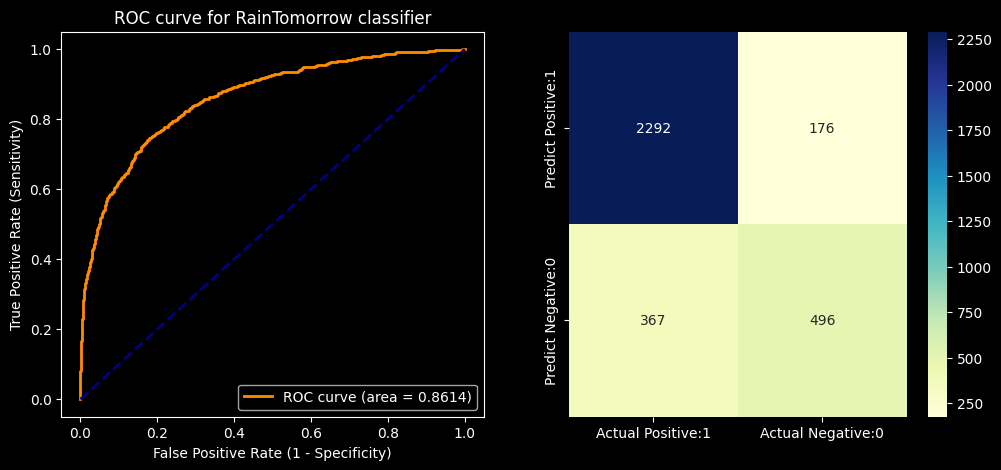

In [237]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_lrs1 = (clf_lrs_multi.predict_proba(x_multi)[:,1])
y_pred_lrs1 = y_pred_lrs1.reshape(-1,1)
fper, tper, _ = roc_curve(y_multi, y_pred_lrs1, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_lrs = confusion_matrix(y_multi, clf_lrs_multi.predict(x_multi))
cm_matrix_lrs = pd.DataFrame(data=cm_lrs, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_lrs, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

### **Performance metrics**

* Precision
$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$
* Recall
$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$
* AUC (ROC)

In [238]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [239]:
precision_score(y_multi, clf_lrs_multi.predict(x_multi))

0.7380952380952381

In [240]:
recall_score(y_multi, clf_lrs_multi.predict(x_multi))

0.574739281575898

In [241]:
roc_auc_score(y_multi, clf_lrs_multi.predict(x_multi))

0.7517132388430544

In [242]:
y_pred_lrs = clf_lrs_multi.predict(x_multi)

acc_lrs = accuracy_score(y_multi, y_pred_lrs)
f1_lrs = f1_score(y_multi, y_pred_lrs, average='weighted')
roc_lrs = roc_auc_score(y_multi, y_pred_lrs1)

print('Accuracy: ', acc_lrs,'\nF1 Score: ', f1_lrs, '\nAUC(ROC): ', roc_lrs )
print("Classification Report: ")
print(classification_report(y_multi, y_pred_lrs))

Accuracy:  0.8369858901230861 
F1 Score:  0.8298804137575287 
AUC(ROC):  0.8613980855295407
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2468
           1       0.74      0.57      0.65       863

    accuracy                           0.84      3331
   macro avg       0.80      0.75      0.77      3331
weighted avg       0.83      0.84      0.83      3331



## **Model_2: Linear Discriminant Analysis**

In [243]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(x_multi, y_multi)

LinearDiscriminantAnalysis()

In [244]:
y_pred_lda = clf_lda.predict(x_multi)
y_pred_lda1 = (clf_lda.predict_proba(x_multi)[:,1])
y_pred_lda1 = y_pred_lda1.reshape(-1,1)

acc_lda = accuracy_score(y_multi, y_pred_lda)
f1_lda = f1_score(y_multi, y_pred_lda, average='weighted')
roc_lda = roc_auc_score(y_multi, y_pred_lda1)

print('Accuracy: ', acc_lda,'\nF1 Score: ', f1_lda, '\nAUC(ROC): ', roc_lda)
print("Classification Report: ")
print(classification_report(y_multi, y_pred_lda))

Accuracy:  0.8321825277694386 
F1 Score:  0.8268814745870335 
AUC(ROC):  0.8616887116857069
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2468
           1       0.71      0.59      0.65       863

    accuracy                           0.83      3331
   macro avg       0.79      0.75      0.77      3331
weighted avg       0.83      0.83      0.83      3331



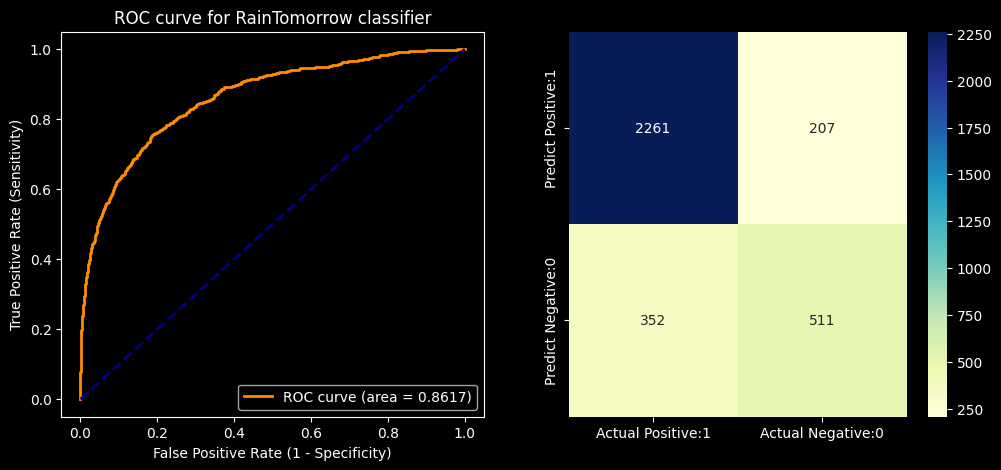

In [245]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_lda1 = (clf_lda.predict_proba(x_multi)[:,1])
y_pred_lda1 = y_pred_lda1.reshape(-1,1)
fper, tper, _ = roc_curve(y_multi, y_pred_lda1, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_lda = confusion_matrix(y_multi, clf_lda.predict(x_multi))
cm_matrix_lda = pd.DataFrame(data=cm_lda, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_lda, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

## **Model_3: K-Nearest Neighbors**

In [247]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(x_train)
x_train_s= scaler1.transform(x_train)

In [248]:
scaler2 = preprocessing.StandardScaler().fit(x_test)
x_test_s= scaler2.transform(x_test)

### KNN With n_neighbors = 1

In [249]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

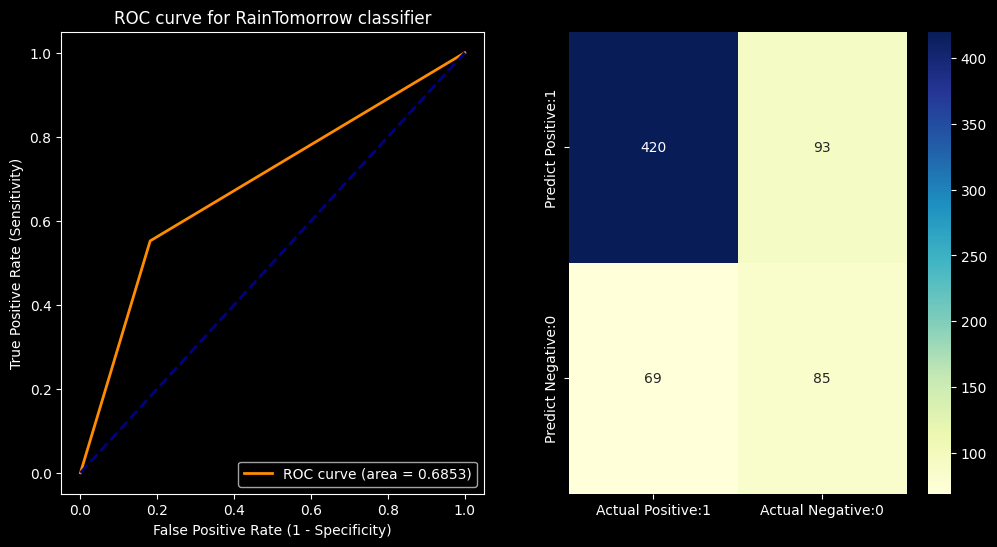

In [250]:
# plot ROC Curve
y_pred_knn1_1 = (clf_knn_1.predict_proba(x_test_s)[:,1])
fper, tper, _ = roc_curve(y_test, y_pred_knn1_1, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_knn1 = confusion_matrix(y_test, clf_knn_1.predict(x_test_s))
cm_matrix_knn1 = pd.DataFrame(data=cm_knn1, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_knn1, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

In [307]:
# Trainng data 
acc_train_knn1 = accuracy_score(y_train, clf_knn_1.predict(x_train_s))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_knn1)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_knn1 = clf_knn_1.predict(x_test_s)

acc_knn1 = accuracy_score(y_test, y_pred_knn1)
f1_knn1 = f1_score(y_test, y_pred_knn1, average='weighted')
roc_knn1 = roc_auc_score(y_test, y_pred_knn1)

print('Accuracy: ', acc_knn1,'\nF1 Score: ', f1_knn1, '\nAUC(ROC): ', roc_knn1)
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn1))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.7571214392803598 
F1 Score:  0.7629914571608214 
AUC(ROC):  0.6853307511202248
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       513
           1       0.48      0.55      0.51       154

    accuracy                           0.76       667
   macro avg       0.67      0.69      0.68       667
weighted avg       0.77      0.76      0.76       667



### KNN With n_neighbors = 3

In [252]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

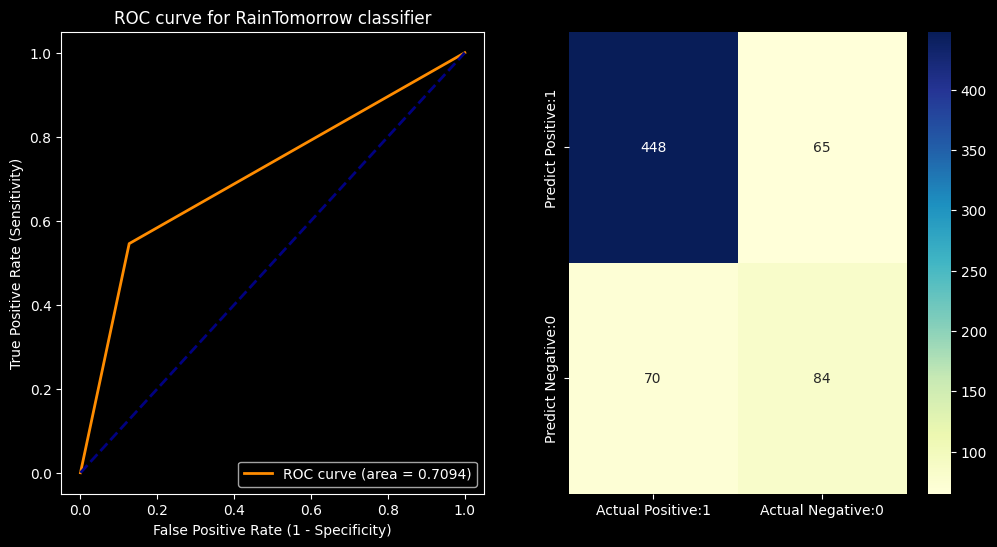

In [253]:
# plot ROC Curve
prob = clf_knn_3.predict(x_test_s)
fper, tper, _ = roc_curve(y_test, prob)
auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_knn3 = confusion_matrix(y_test, clf_knn_3.predict(x_test_s))
cm_matrix_knn3 = pd.DataFrame(data=cm_knn3, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_knn3, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

In [308]:
# Trainng data 
acc_train_knn3 = accuracy_score(y_train, clf_knn_3.predict(x_train_s))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_knn3)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_knn3 = clf_knn_3.predict(x_test_s)

acc_knn3 = accuracy_score(y_test, y_pred_knn3)
f1_knn3 = f1_score(y_test, y_pred_knn3, average='weighted')
roc_knn3 = roc_auc_score(y_test, y_pred_knn3)

print('Accuracy: ', acc_knn3,'\nF1 Score: ', f1_knn3, '\nAUC(ROC): ', roc_knn3)
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn3))

Training Data Metrics:
Accuracy:  0.8791291291291291

Testing Data Metrics:
Accuracy:  0.7976011994002998 
F1 Score:  0.796422025036305 
AUC(ROC):  0.7093744462165514
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       513
           1       0.56      0.55      0.55       154

    accuracy                           0.80       667
   macro avg       0.71      0.71      0.71       667
weighted avg       0.80      0.80      0.80       667



### Finding the Best K using Gridsearch

In [255]:
from sklearn.model_selection import GridSearchCV

#Creating a dictionary of n_neighbors
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,30,50,75,100]}

#creating a object
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)
grid_search_cv.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                         50, 75, 100]})

In [256]:
grid_search_cv.best_params_

{'n_neighbors': 20}

In [257]:
optimised_KNN = grid_search_cv.best_estimator_

### Model Performance After Grid Search

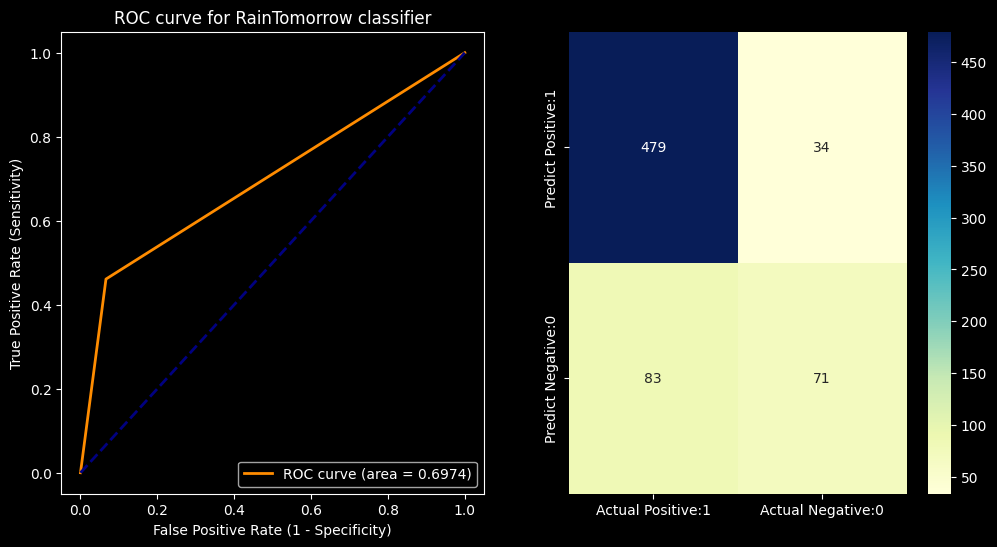

In [258]:
# plot ROC Curve
prob = optimised_KNN.predict(x_test_s)
fper, tper, _ = roc_curve(y_test, prob)
auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
from sklearn.metrics import confusion_matrix
cm_knn_op = confusion_matrix(y_test, optimised_KNN.predict(x_test_s))
cm_matrix_knnOP = pd.DataFrame(data=cm_knn_op, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_knnOP, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

In [309]:
# Trainng data 
acc_train_knnop = accuracy_score(y_train, optimised_KNN.predict(x_train_s))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_knnop)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_knnop = optimised_KNN.predict(x_test_s)

acc_knnop = accuracy_score(y_test, y_pred_knnop)
f1_knnop = f1_score(y_test, y_pred_knnop, average='weighted')
roc_knnop = roc_auc_score(y_test, y_pred_knnop)

print('Accuracy: ', acc_knnop,'\nF1 Score: ', f1_knnop, '\nAUC(ROC): ', roc_knnop)
print("Classification Report: ")
print(classification_report(y_test, y_pred_knnop))

Training Data Metrics:
Accuracy:  0.8419669669669669

Testing Data Metrics:
Accuracy:  0.8245877061469266 
F1 Score:  0.8119924198805688 
AUC(ROC):  0.6973810789600264
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       513
           1       0.68      0.46      0.55       154

    accuracy                           0.82       667
   macro avg       0.76      0.70      0.72       667
weighted avg       0.81      0.82      0.81       667



## **Model_4: DecisionTreeClassifier**

In [260]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Plotting decision tree

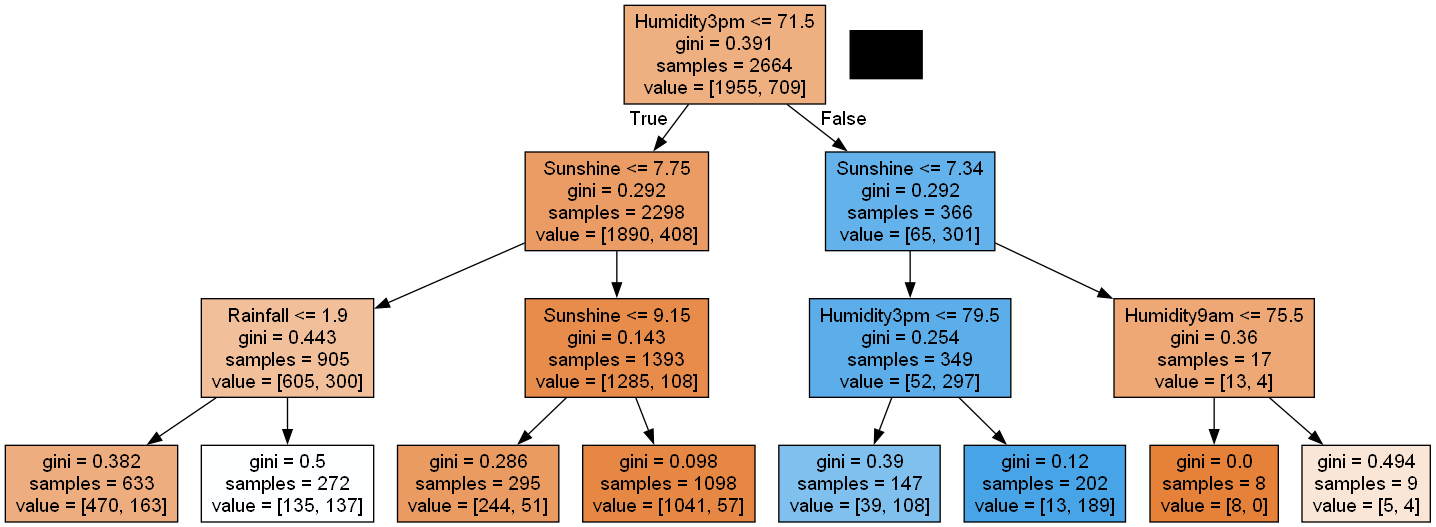

In [261]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Model Performance

In [310]:
# Trainng data 
acc_train_clftree = accuracy_score(y_train, clftree.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_clftree)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_clftree = clftree.predict(x_test)

acc_clftree = accuracy_score(y_test, y_pred_clftree)
f1_clftree = f1_score(y_test, y_pred_clftree, average='weighted')
roc_clftree = roc_auc_score(y_test, y_pred_clftree01)

print('Accuracy: ', acc_clftree,'\nF1 Score: ', f1_clftree, '\nAUC(ROC): ', roc_clftree)
print("Classification Report: ")
print(classification_report(y_test, y_pred_clftree))

Training Data Metrics:
Accuracy:  0.8265765765765766

Testing Data Metrics:
Accuracy:  0.8065967016491754 
F1 Score:  0.7992034253474088 
AUC(ROC):  0.7872269056479584
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       513
           1       0.60      0.49      0.54       154

    accuracy                           0.81       667
   macro avg       0.73      0.69      0.71       667
weighted avg       0.80      0.81      0.80       667



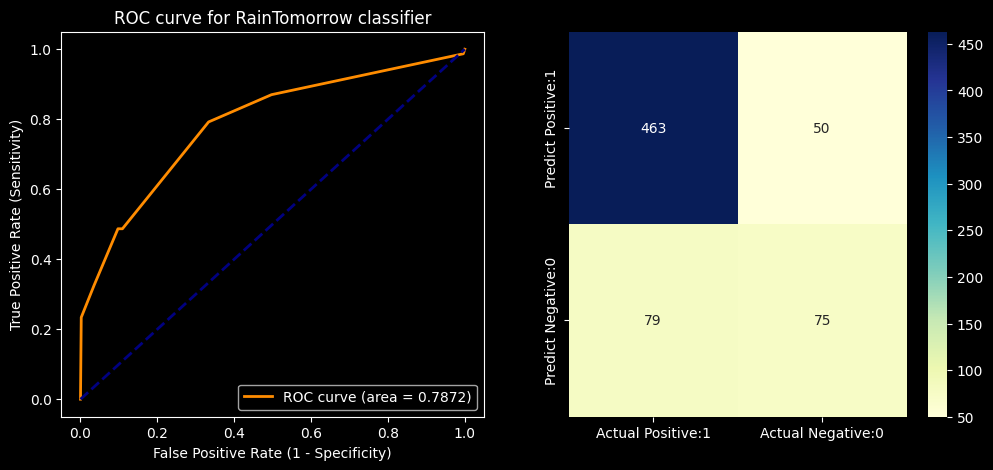

In [263]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_clftree01 = (clftree.predict_proba(x_test)[:,1])
y_pred_clftree01 = y_pred_clftree01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_clftree01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_clftree = confusion_matrix(y_test, clftree.predict(x_test))
cm_matrix_clftree = pd.DataFrame(data=cm_clftree, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_clftree, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

### Controlling Tree growth

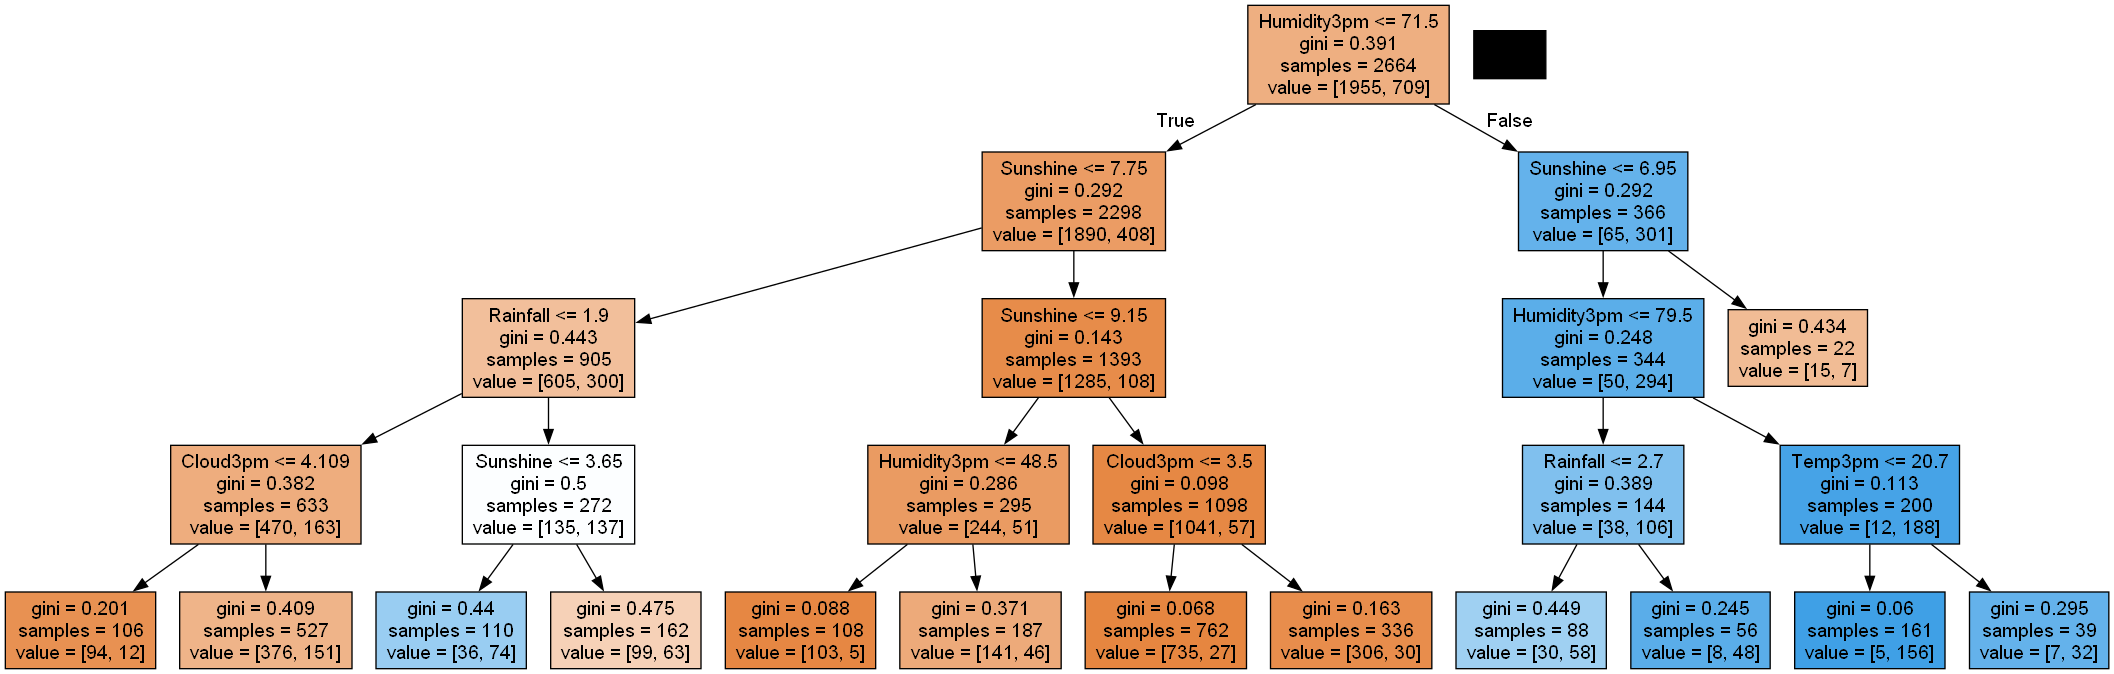

In [264]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(x_train, y_train)
dot_data1 = tree.export_graphviz(clftree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data1)
Image(graph2.create_png())

### Model Performance after Controlling the tree growth

In [311]:
# Trainng data 
acc_train_clftree2 = accuracy_score(y_train, clftree2.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_clftree2)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_clftree2 = clftree2.predict(x_test)

acc_clftree2 = accuracy_score(y_test, y_pred_clftree2)
f1_clftree2 = f1_score(y_test, y_pred_clftree2, average='weighted')
roc_clftree2 = roc_auc_score(y_test, y_pred_clftree2)

print('Accuracy: ', acc_clftree2,'\nF1 Score: ', f1_clftree2, '\nAUC(ROC): ', roc_clftree2)
print("Classification Report: ")
print(classification_report(y_test, y_pred_clftree2))

Training Data Metrics:
Accuracy:  0.8397147147147147

Testing Data Metrics:
Accuracy:  0.8305847076461769 
F1 Score:  0.8122277880015017 
AUC(ROC):  0.6853750537961065
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       513
           1       0.74      0.42      0.53       154

    accuracy                           0.83       667
   macro avg       0.79      0.69      0.71       667
weighted avg       0.82      0.83      0.81       667



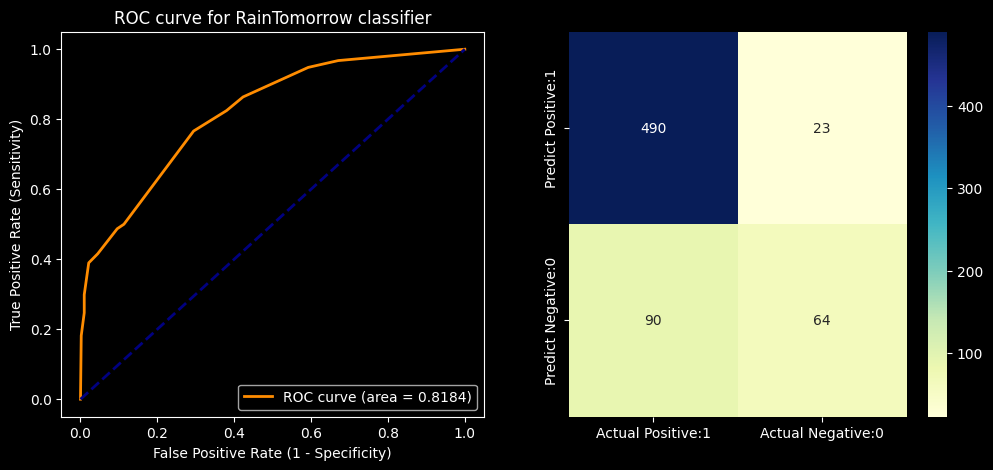

In [266]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_clftree201 = (clftree2.predict_proba(x_test)[:,1])
y_pred_clftree201 = y_pred_clftree201.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_clftree201, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_clftree2 = confusion_matrix(y_test, clftree2.predict(x_test))
cm_matrix_clftree2 = pd.DataFrame(data=cm_clftree2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_clftree2, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

### Bagging

In [267]:
clftree3 = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=clftree3, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

### Model Performance after Bagging

In [312]:
# Trainng data 
acc_train_bag = accuracy_score(y_train, bag_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_bag)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_bag = bag_clf.predict(x_test)

acc_bag = accuracy_score(y_test, y_pred_bag)
f1_bag = f1_score(y_test, y_pred_bag, average='weighted')
roc_bag = roc_auc_score(y_test, y_pred_bag)

print('Accuracy: ', acc_bag,'\nF1 Score: ', f1_bag, '\nAUC(ROC): ', roc_bag)
print("Classification Report: ")
print(classification_report(y_test, y_pred_bag))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.8200899550224887 
F1 Score:  0.8094240874831655 
AUC(ROC):  0.6990012911065543
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       513
           1       0.65      0.47      0.55       154

    accuracy                           0.82       667
   macro avg       0.75      0.70      0.72       667
weighted avg       0.81      0.82      0.81       667



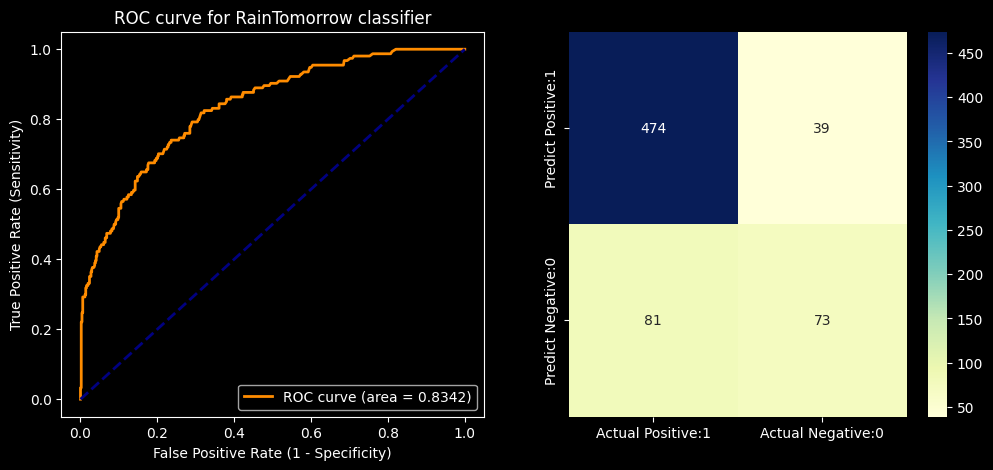

In [269]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_bag01 = (bag_clf.predict_proba(x_test)[:,1])
y_pred_bag01 = y_pred_bag01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_bag01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_bag_clf = confusion_matrix(y_test, bag_clf.predict(x_test))
cm_matrix_bag_clf = pd.DataFrame(data=cm_bag_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_bag_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

## **Model_5: Random Forest**

In [270]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

### Model Performance

In [313]:
# Trainng data 
acc_train_rfclf = accuracy_score(y_train, rf_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_rfclf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_rfclf = rf_clf.predict(x_test)

acc_rfclf = accuracy_score(y_test, y_pred_rfclf)
f1_rfclf = f1_score(y_test, y_pred_rfclf, average='weighted')
roc_rfclf = roc_auc_score(y_test, y_pred_rfclf)

print('Accuracy: ', acc_rfclf,'\nF1 Score: ', f1_rfclf, '\nAUC(ROC): ', roc_rfclf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_rfclf))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.823088455772114 
F1 Score:  0.8132052676582378 
AUC(ROC):  0.7054947976000607
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       513
           1       0.66      0.49      0.56       154

    accuracy                           0.82       667
   macro avg       0.76      0.71      0.72       667
weighted avg       0.81      0.82      0.81       667



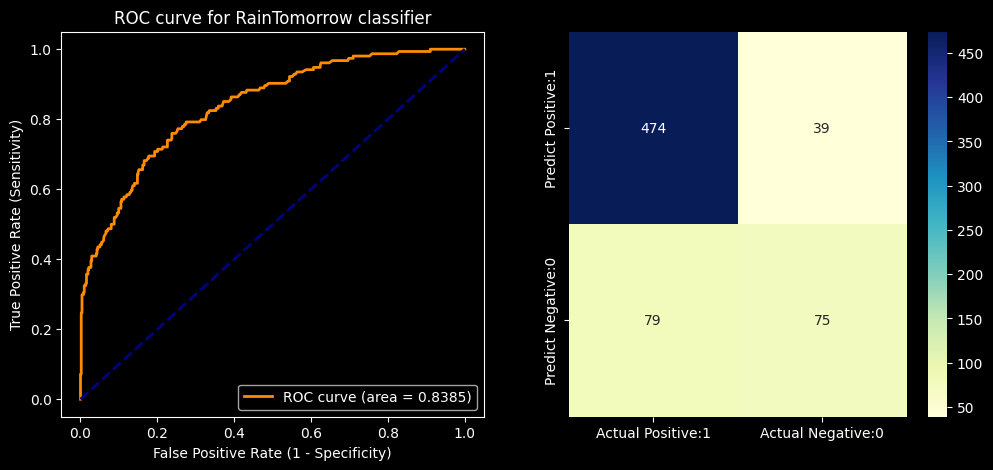

In [272]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_rfclf01 = (rf_clf.predict_proba(x_test)[:,1])
y_pred_rfclf01 = y_pred_rfclf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_rfclf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_rfclf = confusion_matrix(y_test, rf_clf.predict(x_test))
cm_matrix_rfclf = pd.DataFrame(data=cm_rfclf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_rfclf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

### Grid Search

In [273]:
from sklearn.model_selection import GridSearchCV
rf_clf_grid = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 6, 10],}
grid_search = GridSearchCV(rf_clf_grid, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 6, 10]},
             scoring='accuracy')

In [274]:
grid_search.best_params_
cvrf_clf = grid_search.best_estimator_

### Model Performance After Grid Search

In [314]:
# Trainng data 
acc_train_cvrf_clf = accuracy_score(y_train, cvrf_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_cvrf_clf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_cvrf_clf = cvrf_clf.predict(x_test)

acc_cvrf_clf = accuracy_score(y_test, y_pred_cvrf_clf)
f1_cvrf_clf = f1_score(y_test, y_pred_cvrf_clf, average='weighted')
roc_cvrf_clf = roc_auc_score(y_test, y_pred_cvrf_clf)

print('Accuracy: ', acc_cvrf_clf,'\nF1 Score: ', f1_cvrf_clf, '\nAUC(ROC): ', roc_cvrf_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_cvrf_clf))

Training Data Metrics:
Accuracy:  0.9583333333333334

Testing Data Metrics:
Accuracy:  0.823088455772114 
F1 Score:  0.8126003526917794 
AUC(ROC):  0.7032227032227033
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       513
           1       0.66      0.48      0.56       154

    accuracy                           0.82       667
   macro avg       0.76      0.70      0.72       667
weighted avg       0.81      0.82      0.81       667



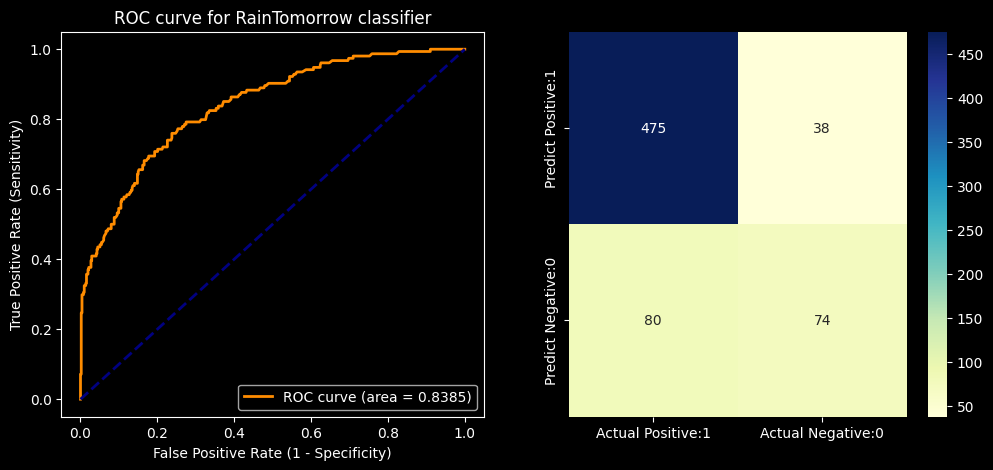

In [276]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_cvrf_clf01 = (cvrf_clf.predict_proba(x_test)[:,1])
y_pred_cvrf_clf01 = y_pred_rfclf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_cvrf_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_cvrf_clf = confusion_matrix(y_test, cvrf_clf.predict(x_test))
cm_matrix_cvrf_clf = pd.DataFrame(data=cm_cvrf_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_cvrf_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

plt.show()

## **Model_6: Gradient Boosting**

In [277]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=1000,
                                     max_features=6,
                                     min_samples_split=2,
                                     random_state=42)
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier(max_features=6, n_estimators=1000, random_state=42)

### Model Performance

In [315]:
# Trainng data 
acc_train_gbc_clf = accuracy_score(y_train, gbc_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_gbc_clf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_gbc_clf = gbc_clf.predict(x_test)

acc_gbc_clf = accuracy_score(y_test, y_pred_gbc_clf)
f1_gbc_clf = f1_score(y_test, y_pred_gbc_clf, average='weighted')
roc_gbc_clf = roc_auc_score(y_test, y_pred_gbc_clf)

print('Accuracy: ', acc_gbc_clf,'\nF1 Score: ', f1_gbc_clf, '\nAUC(ROC): ', roc_gbc_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_gbc_clf))

Training Data Metrics:
Accuracy:  0.9962462462462462

Testing Data Metrics:
Accuracy:  0.823088455772114 
F1 Score:  0.8171191283251668 
AUC(ROC):  0.7213994582415635
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       513
           1       0.64      0.53      0.58       154

    accuracy                           0.82       667
   macro avg       0.75      0.72      0.73       667
weighted avg       0.81      0.82      0.82       667



<Axes: >

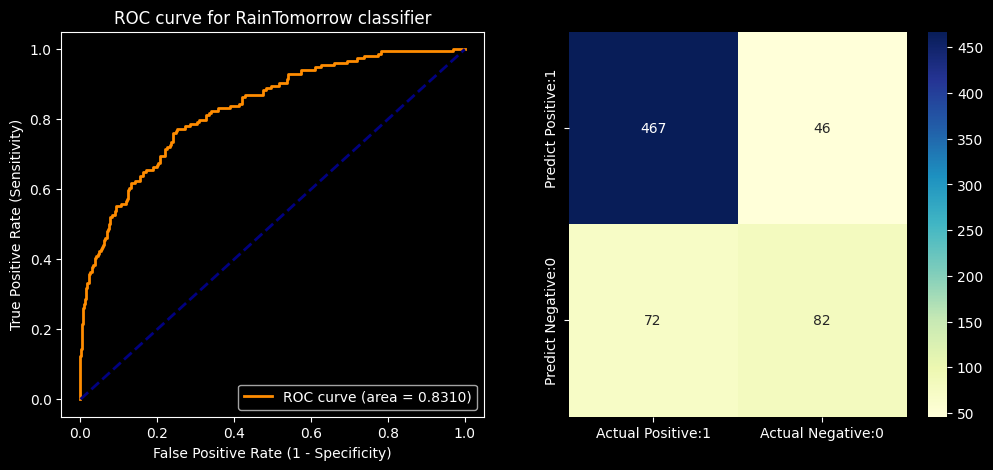

In [279]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_gbc_clf01 = (gbc_clf.predict_proba(x_test)[:,1])
y_pred_gbc_clf01 = y_pred_gbc_clf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_gbc_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_gbc_clf = confusion_matrix(y_test, gbc_clf.predict(x_test))
cm_matrix_gbc_clf = pd.DataFrame(data=cm_gbc_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_gbc_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)


### Using Diff Parameter

In [280]:
gbc_clf2 = GradientBoostingClassifier(learning_rate=0.02,
                                     n_estimators=1000,
                                     max_depth=1,)
gbc_clf2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

### Model Performance After Using Diff Parameter

In [316]:
acc_train_gbc_clf2 = accuracy_score(y_train, gbc_clf2.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_gbc_clf2)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_gbc_clf2 = gbc_clf2.predict(x_test)

acc_gbc_clf2 = accuracy_score(y_test, y_pred_gbc_clf2)
f1_gbc_clf2 = f1_score(y_test, y_pred_gbc_clf2, average='weighted')
roc_gbc_clf2 = roc_auc_score(y_test, y_pred_gbc_clf2)

print('Accuracy: ', acc_gbc_clf2,'\nF1 Score: ', f1_gbc_clf2, '\nAUC(ROC): ', roc_gbc_clf2)
print("Classification Report: ")
print(classification_report(y_test, y_pred_gbc_clf2))

Training Data Metrics:
Accuracy:  0.8468468468468469

Testing Data Metrics:
Accuracy:  0.8380809595202399 
F1 Score:  0.823630133272847 
AUC(ROC):  0.7061530087845878
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       513
           1       0.74      0.46      0.57       154

    accuracy                           0.84       667
   macro avg       0.80      0.71      0.73       667
weighted avg       0.83      0.84      0.82       667



<Axes: >

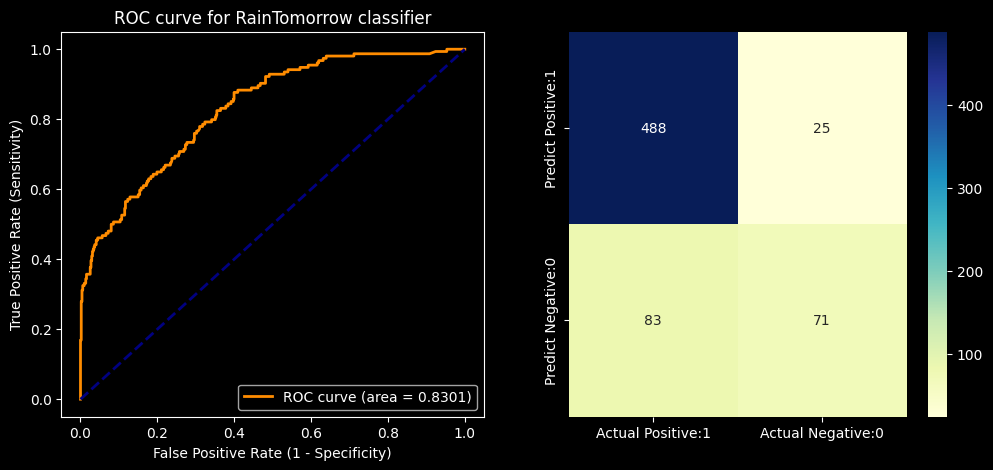

In [282]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_gbc_clf201 = (gbc_clf2.predict_proba(x_test)[:,1])
y_pred_gbc_clf201 = y_pred_gbc_clf201.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_gbc_clf201, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_gbc_clf2 = confusion_matrix(y_test, gbc_clf2.predict(x_test))
cm_matrix_gbc_clf2 = pd.DataFrame(data=cm_gbc_clf2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_gbc_clf2, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

### GB Using Grid Search

In [283]:
gbc_clf_grid = GradientBoostingClassifier(loss='log_loss',
                                          criterion='friedman_mse',
                                          random_state=42)
params_grid_gbc = {"learning_rate": np.arange(0.01,0.11,0.01),
                   "n_estimators" : [500,650,700,850,1000],
                   "max_depth": [1,2,3,4,5],}
grid_search_gbc = GridSearchCV(gbc_clf_grid, params_grid_gbc,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search_gbc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [500, 650, 700, 850, 1000]},
             scoring='accuracy')

In [284]:
grid_search_gbc.best_params_

{'learning_rate': 0.06999999999999999, 'max_depth': 1, 'n_estimators': 850}

In [285]:
cvgbc_clf = grid_search_gbc.best_estimator_

### Model Performance After grid search

In [317]:
acc_train_cvgbc_clf = accuracy_score(y_train, cvgbc_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_cvgbc_clf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_cvgbc_clf = cvgbc_clf.predict(x_test)

acc_cvgbc_clf = accuracy_score(y_test, y_pred_cvgbc_clf)
f1_cvgbc_clf = f1_score(y_test, y_pred_cvgbc_clf, average='weighted')
roc_cvgbc_clf = roc_auc_score(y_test, y_pred_cvgbc_clf)

print('Accuracy: ', acc_cvgbc_clf,'\nF1 Score: ', f1_cvgbc_clf, '\nAUC(ROC): ', roc_cvgbc_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_cvgbc_clf))

Training Data Metrics:
Accuracy:  0.8554804804804805

Testing Data Metrics:
Accuracy:  0.8335832083958021 
F1 Score:  0.8210112669080849 
AUC(ROC):  0.7077732209311156
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       513
           1       0.71      0.47      0.57       154

    accuracy                           0.83       667
   macro avg       0.78      0.71      0.73       667
weighted avg       0.82      0.83      0.82       667



<Axes: >

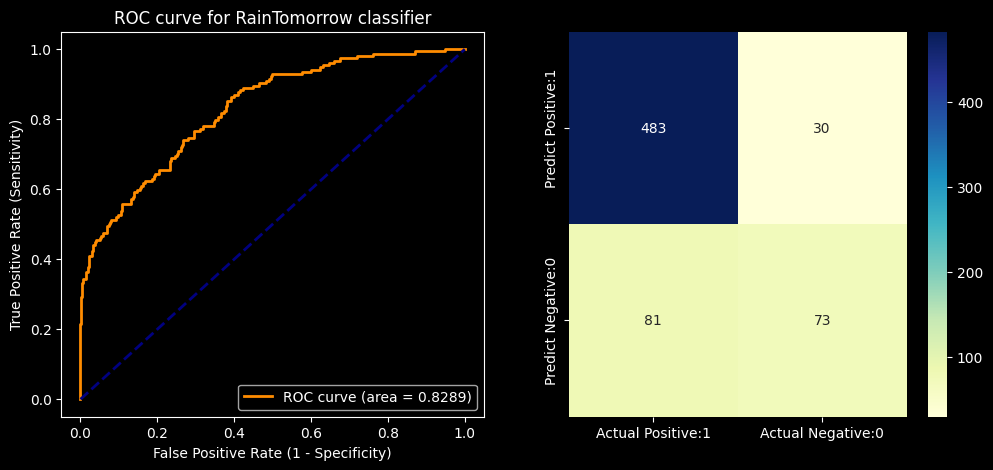

In [287]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_cvgbc_clf01 = (cvgbc_clf.predict_proba(x_test)[:,1])
y_pred_cvgbc_clf01 = y_pred_cvgbc_clf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_cvgbc_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_cvgbc_clf = confusion_matrix(y_test, cvgbc_clf.predict(x_test))
cm_matrix_cvgbc_clf = pd.DataFrame(data=cm_cvgbc_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_cvgbc_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

## **Model_7: Ada Boost**

In [288]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

### Model Performance

In [318]:
# Trainng data 
acc_train_ada_clf = accuracy_score(y_train, ada_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_ada_clf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_ada_clf = ada_clf.predict(x_test)

acc_ada_clf = accuracy_score(y_test, y_pred_ada_clf)
f1_ada_clf = f1_score(y_test, y_pred_ada_clf, average='weighted')
roc_ada_clf = roc_auc_score(y_test, y_pred_ada_clf)

print('Accuracy: ', acc_ada_clf,'\nF1 Score: ', f1_ada_clf, '\nAUC(ROC): ', roc_ada_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_ada_clf))

Training Data Metrics:
Accuracy:  0.853978978978979

Testing Data Metrics:
Accuracy:  0.8320839580209896 
F1 Score:  0.8190799080978992 
AUC(ROC):  0.7045264676843624
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       513
           1       0.71      0.47      0.56       154

    accuracy                           0.83       667
   macro avg       0.78      0.70      0.73       667
weighted avg       0.82      0.83      0.82       667



<Axes: >

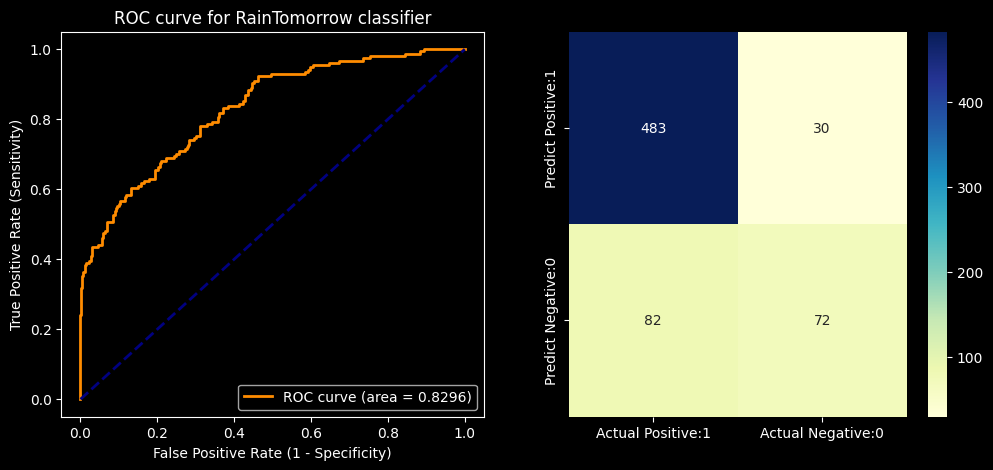

In [290]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_ada_clf01 = (ada_clf.predict_proba(x_test)[:,1])
y_pred_ada_clf01 = y_pred_ada_clf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_ada_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_ada_clf = confusion_matrix(y_test, ada_clf.predict(x_test))
cm_matrix_ada_clf = pd.DataFrame(data=cm_ada_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_ada_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

### Using Diff Parameter

In [291]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)
ada_clf2.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                    n_jobs=-1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

### Model Performance after Using diff parameter

In [319]:
# Trainng data 
acc_train_ada_clf2 = accuracy_score(y_train, ada_clf2.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_ada_clf2)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_ada_clf2 = ada_clf2.predict(x_test)

acc_ada_clf2 = accuracy_score(y_test, y_pred_ada_clf2)
f1_ada_clf2 = f1_score(y_test, y_pred_ada_clf2, average='weighted')
roc_ada_clf2 = roc_auc_score(y_test, y_pred_ada_clf2)

print('Accuracy: ', acc_ada_clf2,'\nF1 Score: ', f1_ada_clf2, '\nAUC(ROC): ', roc_ada_clf2)
print("Classification Report: ")
print(classification_report(y_test, y_pred_ada_clf2))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.8215892053973014 
F1 Score:  0.8113187596044339 
AUC(ROC):  0.7022480443533076
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       513
           1       0.65      0.48      0.55       154

    accuracy                           0.82       667
   macro avg       0.76      0.70      0.72       667
weighted avg       0.81      0.82      0.81       667



<Axes: >

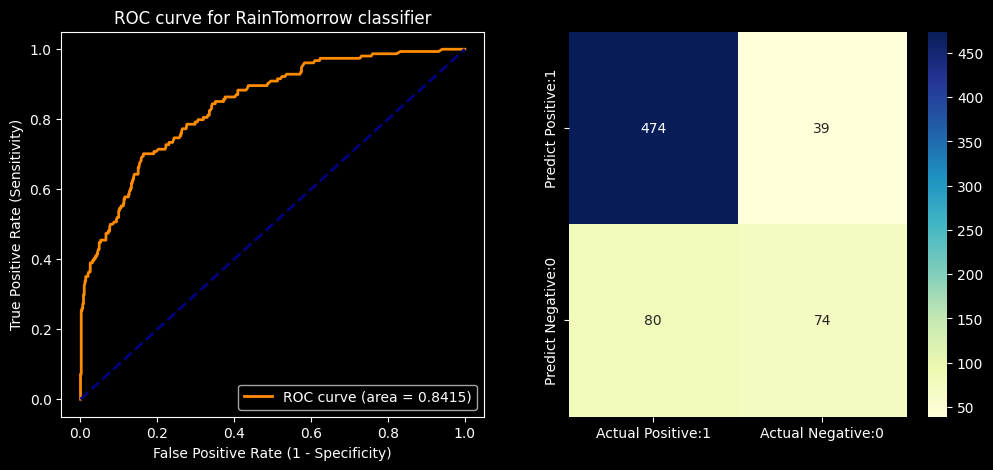

In [293]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_ada_clf201 = (ada_clf2.predict_proba(x_test)[:,1])
y_pred_ada_clf201 = y_pred_ada_clf201.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_ada_clf201, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_ada_clf2 = confusion_matrix(y_test, ada_clf2.predict(x_test))
cm_matrix_ada_clf2 = pd.DataFrame(data=cm_ada_clf2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_ada_clf2, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

### Using grid search

In [321]:
from sklearn.tree import DecisionTreeClassifier
# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=2)  # You can experiment with different depths

# Define the AdaBoost model with the new base estimator
ada_clf_grid = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Reduce the number of estimators
params_grid_ada = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.02, 0.05, 0.1]
}

# Perform grid search
grid_search_ada = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), random_state=42), 
                               params_grid_ada, n_jobs=-1, cv=5, scoring='accuracy')
grid_search_ada.fit(x_train, y_train)

# Get the best model
print('Best Params: ', grid_search_ada.best_params_)
cv_ada_clf = grid_search_ada.best_estimator_

# Training data metrics
acc_train_cv_ada_clf = accuracy_score(y_train, cv_ada_clf.predict(x_train))

print("Training Data Metrics:")
print('Accuracy: ', acc_train_cv_ada_clf)


# Test data metrics
y_test_pred_cv_ada_clf = cv_ada_clf.predict(x_test)
acc_test_cv_ada_clf = accuracy_score(y_test, y_test_pred_cv_ada_clf)
f1_test_cv_ada_clf = f1_score(y_test, y_test_pred_cv_ada_clf, average='weighted')
roc_test_cv_ada_clf = roc_auc_score(y_test, y_test_pred_cv_ada_clf)

print("\nTest Data Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_cv_ada_clf))
print('Accuracy: ', acc_test_cv_ada_clf,'\nF1 Score: ', f1_test_cv_ada_clf,'\nAUC(ROC): ', roc_test_cv_ada_clf)
print("Classification Report:\n", classification_report(y_test, y_test_pred_cv_ada_clf))


Best Params:  {'learning_rate': 0.01, 'n_estimators': 100}
Training Data Metrics:
Accuracy:  0.8370870870870871

Test Data Metrics:
Confusion Matrix:
 [[495  18]
 [ 95  59]]
Accuracy:  0.8305847076461769 
F1 Score:  0.8082622333438901 
AUC(ROC):  0.6740145819093188
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       513
           1       0.77      0.38      0.51       154

    accuracy                           0.83       667
   macro avg       0.80      0.67      0.70       667
weighted avg       0.82      0.83      0.81       667



<Axes: >

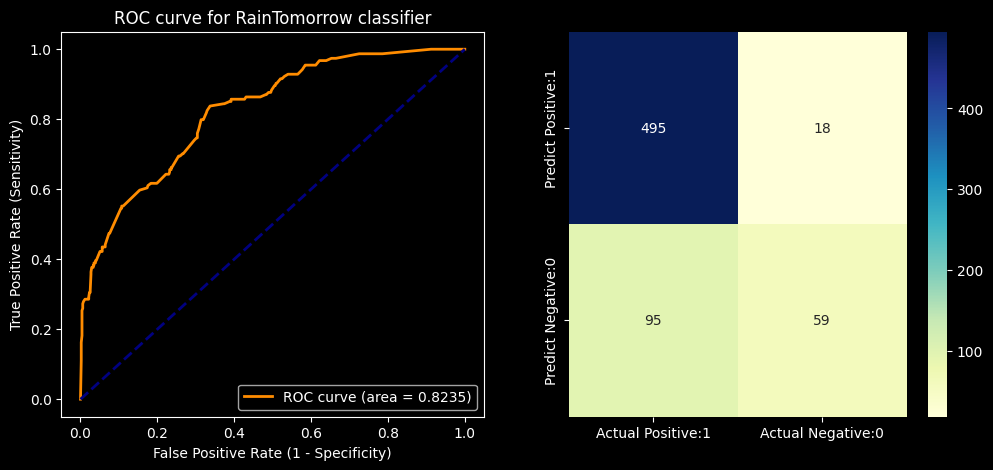

In [325]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_ada_clf201 = (cv_ada_clf.predict_proba(x_test)[:,1])
y_pred_ada_clf201 = y_pred_ada_clf201.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_ada_clf201, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_ada_clf2 = confusion_matrix(y_test,cv_ada_clf.predict(x_test))
cm_matrix_ada_clf2 = pd.DataFrame(data=cm_ada_clf2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_ada_clf2, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

## **Model_08: XG Boost**

In [294]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1, random_state=42)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

### Plot importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

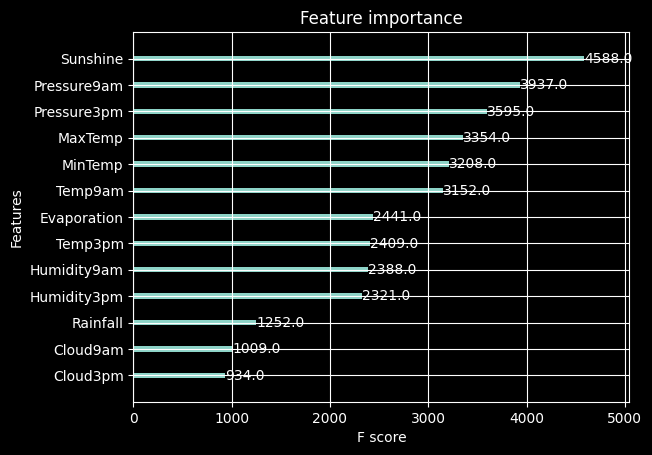

In [295]:
xgb.plot_importance(xgb_clf)

### Model Performance

In [322]:
# Trainng data 
acc_train_xgb_clf = accuracy_score(y_train, xgb_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_xgb_clf)

# Testing data 
print("\nTesting Data Metrics:")
y_pred_xgb_clf = xgb_clf.predict(x_test)

acc_xgb_clf = accuracy_score(y_test, y_pred_xgb_clf)
f1_xgb_clf = f1_score(y_test, y_pred_xgb_clf, average='weighted')
roc_xgb_clf = roc_auc_score(y_test, y_pred_xgb_clf)

print('Accuracy: ', acc_xgb_clf,'\nF1 Score: ', f1_xgb_clf, '\nAUC(ROC): ', roc_xgb_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb_clf))

Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:
Accuracy:  0.8185907046476761 
F1 Score:  0.8137730701355592 
AUC(ROC):  0.7207475760107339
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       513
           1       0.62      0.54      0.58       154

    accuracy                           0.82       667
   macro avg       0.75      0.72      0.73       667
weighted avg       0.81      0.82      0.81       667



<Axes: >

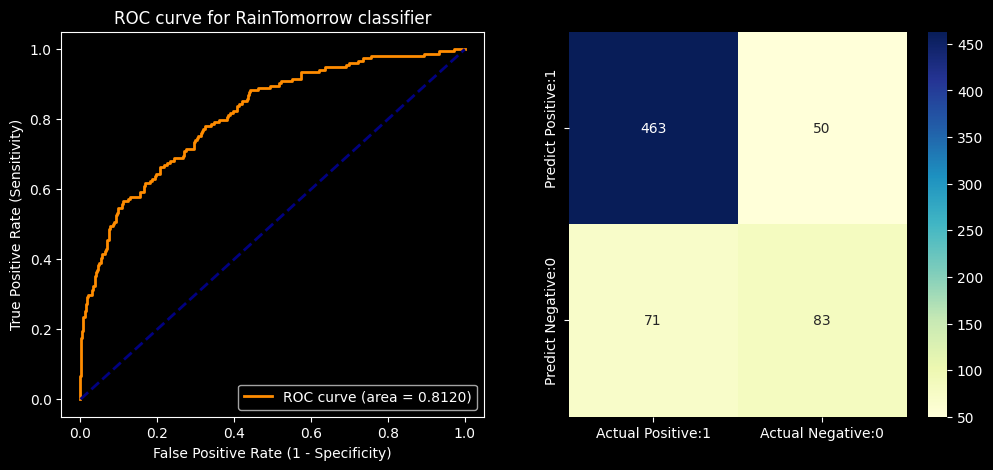

In [297]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_xgb_clf01 = (xgb_clf.predict_proba(x_test)[:,1])
y_pred_xgb_clf01 = y_pred_xgb_clf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_xgb_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_xgb_clf = confusion_matrix(y_test, xgb_clf.predict(x_test))
cm_matrix_xgb_clf = pd.DataFrame(data=cm_xgb_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_xgb_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

### XGB Using Grid Search

In [298]:
xgb_clf1 = xgb.XGBClassifier(n_estimators=2500,learning_rate=0.1,
                             random_state=42)
param_test_xgb = {
    'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
     }
grid_search_xgb = GridSearchCV(xgb_clf1, param_test_xgb,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=2500,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [299]:
grid_search_xgb.best_estimator_
cvxgb_clf = grid_search_xgb.best_estimator_

### Model Performance After grid search

In [324]:
# Training data metrics
acc_train_cvxgb_clf = accuracy_score(y_train, cvxgb_clf.predict(x_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_cvxgb_clf)

# Test data metrics
print("\nTesting Data Metrics:")
y_pred_cvxgb_clf = cvxgb_clf.predict(x_test)

acc_cvxgb_clf = accuracy_score(y_test, y_pred_cvxgb_clf)
f1_cvxgb_clf = f1_score(y_test, y_pred_cvxgb_clf, average='weighted')
roc_cvxgb_clf = roc_auc_score(y_test, y_pred_cvxgb_clf)

print('Accuracy: ', acc_cvxgb_clf,'\nF1 Score: ', f1_cvxgb_clf, '\nAUC(ROC): ', roc_cvxgb_clf)
print("Classification Report: ")
print(classification_report(y_test, y_pred_cvxgb_clf))

Training Data Metrics:
Accuracy:  0.9962462462462462

Testing Data Metrics:
Accuracy:  0.8260869565217391 
F1 Score:  0.8191735149429863 
AUC(ROC):  0.7210766816029974
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       513
           1       0.65      0.53      0.58       154

    accuracy                           0.83       667
   macro avg       0.76      0.72      0.74       667
weighted avg       0.82      0.83      0.82       667



<Axes: >

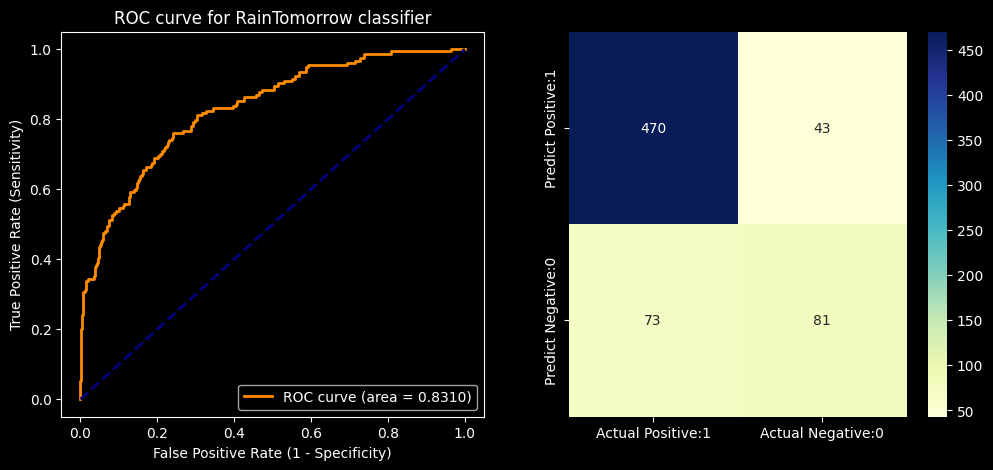

In [301]:
# plot ROC Curve
# store the predicted probabilities for class 1 - Probability of rain
y_pred_cvxgb_clf01 = (cvxgb_clf.predict_proba(x_test)[:,1])
y_pred_cvxgb_clf01 = y_pred_cvxgb_clf01.reshape(-1,1)
fper, tper, _ = roc_curve(y_test, y_pred_cvxgb_clf01, pos_label = 1 )

auc_scr = auc(fper, tper)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Plot the ROC curve on the first subplot
ax1.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_scr)
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--' )
ax1.set_title('ROC curve for RainTomorrow classifier')
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.legend(loc="lower right")

# Plot the confusion matrix on the second subplot
cm_cvxgb_clf = confusion_matrix(y_test, cvxgb_clf.predict(x_test))
cm_matrix_cvxgb_clf = pd.DataFrame(data=cm_cvxgb_clf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_cvxgb_clf, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)

# **Model Comparison**

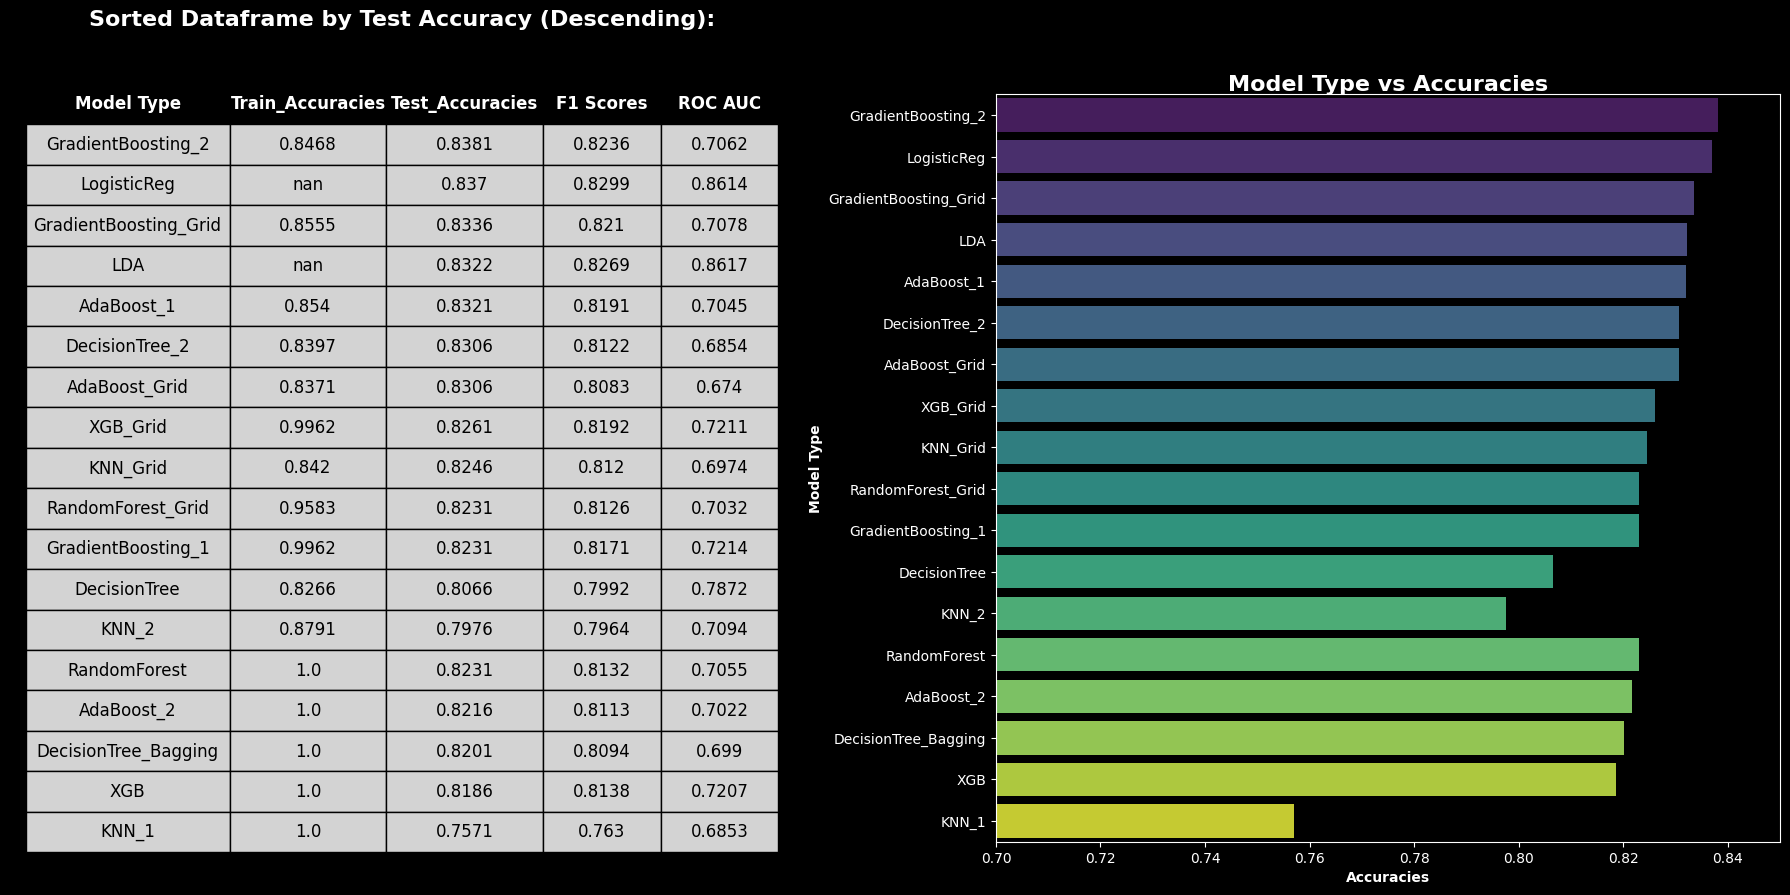

In [331]:
# Sample data (replace these with your actual data)
Train_accuracies = [None, None, acc_train_knn1, acc_train_knn3, acc_train_knnop, acc_train_clftree, acc_train_clftree2, acc_train_bag, acc_train_rfclf, acc_train_cvrf_clf, acc_train_gbc_clf, acc_train_gbc_clf2, acc_train_cvgbc_clf, acc_train_ada_clf,acc_train_ada_clf2, acc_train_cv_ada_clf, acc_train_xgb_clf, acc_train_cvxgb_clf]
Test_accuracies = [acc_lrs, acc_lda, acc_knn1, acc_knn3, acc_knnop, acc_clftree, acc_clftree2, acc_bag, acc_rfclf, acc_cvrf_clf, acc_gbc_clf, acc_gbc_clf2, acc_cvgbc_clf,acc_ada_clf, acc_ada_clf2,acc_test_cv_ada_clf, acc_xgb_clf, acc_cvxgb_clf]
f_score = [f1_lrs, f1_lda, f1_knn1, f1_knn3, f1_knnop, f1_clftree, f1_clftree2, f1_bag, f1_rfclf, f1_cvrf_clf, f1_gbc_clf, f1_gbc_clf2,f1_cvgbc_clf, f1_ada_clf, f1_ada_clf2,f1_test_cv_ada_clf, f1_xgb_clf, f1_cvxgb_clf]
roc_auc = [roc_lrs, roc_lda, roc_knn1, roc_knn3, roc_knnop, roc_clftree, roc_clftree2, roc_bag, roc_rfclf, roc_cvrf_clf, roc_gbc_clf, roc_gbc_clf2, roc_cvgbc_clf,roc_ada_clf, roc_ada_clf2,roc_test_cv_ada_clf, roc_xgb_clf, roc_cvxgb_clf]
model_types = ['LogisticReg', 'LDA', 'KNN_1', 'KNN_2', 'KNN_Grid', 'DecisionTree', 'DecisionTree_2', 'DecisionTree_Bagging', 'RandomForest', 'RandomForest_Grid', 'GradientBoosting_1', 'GradientBoosting_2', 'GradientBoosting_Grid', 'AdaBoost_1', 'AdaBoost_2','AdaBoost_Grid', 'XGB', 'XGB_Grid']

# Create DataFrame
final_df = pd.DataFrame({
    "Model Type": model_types,
    "Train_Accuracies": Train_accuracies,
    "Test_Accuracies": Test_accuracies,
    "F1 Scores": f_score,
    "ROC AUC": roc_auc
})

# Convert None to np.nan for sorting purposes
final_df['Train_Accuracies'] = final_df['Train_Accuracies'].apply(lambda x: float(x) if x is not None else None)

# Create a boolean column to mark if Train_Accuracies is equal to 1
final_df['Train_Acc_Not_1'] = final_df['Train_Accuracies'] != 1.0

# Sort by the boolean column and then by Test_Accuracies in descending order
final_df_s = final_df.sort_values(by=['Train_Acc_Not_1', 'Test_Accuracies'], ascending=[False, False])

# Drop the boolean column as it's no longer needed
final_df_s = final_df_s.drop(columns=['Train_Acc_Not_1'])

# Round the values
final_df_s = final_df_s.round(4)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 9))

# Table plot
ax[0].axis('off')
table = ax[0].table(cellText=final_df_s.values, colLabels=final_df_s.columns, cellLoc='center', loc='center', colWidths=[0.26, 0.20, 0.20, 0.15, 0.15])

# Change background color
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 2.25)

# Set table colors
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    if i == 0:  # Header
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('black')
    else:
        cell.set_facecolor('lightgrey')
        cell.set_text_props(color='black')

# Add title above the table
ax[0].text(0.5, 1.1, 'Sorted Dataframe by Test Accuracy (Descending):', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes, fontsize=16, fontweight='bold')

# Bar plot
sns.barplot(x="Test_Accuracies", y="Model Type", data=final_df_s, palette="viridis", ax=ax[1])
ax[1].set_xlim(0.7, 0.85)
ax[1].set_xlabel("Accuracies", fontsize=10, fontweight='bold')
ax[1].set_ylabel("Model Type", fontsize=10, fontweight='bold')
ax[1].set_title("Model Type vs Accuracies", horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# **Best Model Testing**

In [305]:
dummy_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.863613,22.997029,0.864485,5.185428,7.173663,68.256141,54.717229,1018.349031,1016.021750,4.182587,4.218557,17.814674,21.528680,0.259982,0.259081
std,4.552071,4.488817,1.390948,2.755999,3.802596,15.043902,16.260795,6.997672,7.005448,2.506658,2.411407,4.891371,4.299054,0.438690,0.438196
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.100000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.500000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,3.500000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


In [306]:
import numpy as np

# Assuming the model is stored in rf_classifier_tuned

def input_features():
    feature_names = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday_Yes']
    
    # Minimum and maximum values from the provided summary
    feature_ranges = {
        'MinTemp': (4.3, 27.6),
        'MaxTemp': (11.7, 45.8),
        'Rainfall': (0.0, 119.4),
        'Evaporation': (0.0, 18.4),
        'Sunshine': (0.0, 13.6),
        'Humidity9am': (19.0, 100.0),
        'Humidity3pm': (10.0, 99.0),
        'Pressure9am': (986.7, 1039.0),
        'Pressure3pm': (989.8, 1036.7),
        'Cloud9am': (0.0, 9.0),
        'Cloud3pm': (0.0, 8.0),
        'Temp9am': (6.4, 36.5),
        'Temp3pm': (10.2, 44.7),
        'RainToday_Yes': (0, 1)
    }
    
    features = []
    print("Please enter the weather characteristics:")
    for feature in feature_names:
        min_val, max_val = feature_ranges[feature]
        value = float(input(f"{feature} (min: {min_val}, max: {max_val}): "))
        
        # Ensuring the value is within the range
        if value < min_val or value > max_val:
            print(f"Warning: {feature} value should be between {min_val} and {max_val}.")
        
        features.append(value)
    
    return features

def predict_rain_tomorrow(model, features):
    features_array = np.array([features])  # Convert list to 2D array to match the input shape for prediction
    prediction = model.predict(features_array)
    return prediction[0]

# Example: Assuming the model is already trained and stored in rf_classifier_tuned
features = input_features()
predicted_rain_tomorrow = predict_rain_tomorrow(cvgbc_clf, features)
print(f"The prediction for RainTomorrow is: {'Yes' if predicted_rain_tomorrow == 1 else 'No'}")


Please enter the weather characteristics:


MinTemp (min: 4.3, max: 27.6):  18
MaxTemp (min: 11.7, max: 45.8):  33
Rainfall (min: 0.0, max: 119.4):  99
Evaporation (min: 0.0, max: 18.4):  12
Sunshine (min: 0.0, max: 13.6):  9
Humidity9am (min: 19.0, max: 100.0):  71
Humidity3pm (min: 10.0, max: 99.0):  65
Pressure9am (min: 986.7, max: 1039.0):  993
Pressure3pm (min: 989.8, max: 1036.7):  990
Cloud9am (min: 0.0, max: 9.0):  9
Cloud3pm (min: 0.0, max: 8.0):  7
Temp9am (min: 6.4, max: 36.5):  20
Temp3pm (min: 10.2, max: 44.7):  25
RainToday_Yes (min: 0, max: 1):  1


The prediction for RainTomorrow is: No


# Additional Question Answer

## 1. Your views about the problem statement?

The problem statement is to create a machine learning model that accurately predicts rainfall in Sydney. This involves analyzing historical weather data, which includes factors like temperature, humidity, pressure, sunshine, and cloud cover, to predict if there will be rain the next day. Rainfall prediction is crucial for various purposes, such as:

* **Planning outdoor activities:** People can make informed decisions about scheduling picnics, sporting events, or other outdoor activities based on the predicted chance of rain.
* **Managing water resources:** Accurate rainfall forecasts help water management authorities regulate water usage, optimize reservoir levels, and prepare for potential droughts or floods.
* **Mitigating flood risks:** Early warnings of heavy rainfall allow communities to take necessary precautions to protect themselves from potential flooding, such as preparing sandbags, clearing drainage ditches, and evacuating at-risk areas.
An accurate rainfall prediction model can benefit individuals, businesses, and government agencies in Sydney by enabling them to make informed decisions based on the weather forecast.  This can lead to increased productivity, reduced economic losses, and improved public safety.

## 2. What will be your approach to solving this task?

The approach to solving this task can be broken down into several key steps:

* **Data Acquisition and Preprocessing:**
 1. Begin by collecting the weather data for Sydney from 2008 to 2017. This data might be available from public weather databases or government agencies.
 2. Once obtained, the data needs to be cleaned and preprocessed. This may involve handling missing values, identifying and correcting inconsistencies, and potentially converting categorical variables into numerical representations suitable for machine learning models.

* **Exploratory Data Analysis (EDA):**

  1. After preprocessing, it's important to perform exploratory data analysis (EDA) to understand the characteristics of the data. This might involve visualizing the relationships between different weather features and rainfall, identifying potential outliers, and calculating summary statistics. EDA helps in understanding the data's distribution and potential biases.

* **Model Selection and Training:**

 1. Based on the problem of predicting binary outcomes (rain or no rain), classification machine learning models are suitable candidates.
 2. Choose a variety of models, such as decision trees, random forest, gradient boosting, or other options explored in the provided results. It's often beneficial to experiment with several models to identify the one that performs best on this specific dataset.
 3. Split the preprocessed data into training and testing sets. The training set is used to train the models, and the testing set is used to evaluate their performance on unseen data. Train each model on the training set.

* **Model Evaluation:**
 1. Once trained, evaluate the performance of each model on the testing set. Common metrics for classification tasks include accuracy, F1 score, and ROC AUC. Accuracy measures the overall correctness of the predictions, while F1 score considers both precision and recall. ROC AUC represents the model's ability to distinguish between positive and negative cases (rain vs. no rain).
 2. Compare the evaluation metrics of all the models to determine the one that achieves the best performance on the testing data.

* **Analysis of the Best Model:**

  After identifying the best performing model, it's crucial to analyze its behavior and understand why it outperformed the others. This might involve examining the feature importances learned by the model to identify the weather factors that have the most significant influence on rainfall prediction.

## 3. What were the available ML model options you had to perform this task?

The text mentions several machine learning models suitable for classification tasks:

* Decision Tree Classifiers
* Ensemble Methods:
 1. Random Forest Classifier
 2. Bagging (using Decision Trees)
 3. Boosting (using Gradient Boosting)

Other options used in the provided results include Logistic Regression, LDA, KNN (k-Nearest Neighbors), and XGBoost.

## 4. Which model’s performance is best and what could be the possible reason for that?

Based on the results table, the Gradient Boosting_Grid model has the highest accuracy (0.8366) among the provided models.
* Gradient Boosting is an ensemble technique that sequentially builds decision trees, with each tree focusing on improving the predictions of the previous one.
* This sequential approach allows the model to learn more complex relationships between the weather features and rainfall compared to a single decision tree.

Additionally, the 'Grid' in the model name likely refers to using GridSearchCV, a technique that explores a combination of hyperparameter values to find the optimal configuration for the model. This hyperparameter tuning process can further enhance the model's performance by selecting the settings that best suit the specific dataset.

## 5. What steps can you take to improve this selected model’s performance even further?

Here are some ways to potentially improve the Gradient Boosting model's performance:

* **Hyperparameter Tuning:** Further tune the hyperparameters of the Gradient Boosting model (e.g., learning rate, number of trees) to optimize its performance.
* **Feature Engineering:** Create new features from existing ones that might better capture the relationship between weather factors and rainfall.
Data Augmentation: If possible, consider using data augmentation techniques to artificially increase the size and diversity of the training data.
* **Try Different Ensemble Methods:** Explore other ensemble methods like AdaBoost or XGBoost alongside different hyperparameter configurations.
* **Consider Alternative Models:** While Gradient Boosting performs well here, investigate how deep learning models like recurrent neural networks (RNNs) might handle the sequential nature of weather data.

Note: The provided results table only shows a limited set of models. It's possible that other models or configurations might achieve even better performance.